<a href="https://colab.research.google.com/github/lasnabunan/Epileptic-Classification/blob/master/Seizure_level3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#INSTALL REQUIREMENTS




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls /content/drive/My\ Drive/Seizure/Dataset/Epileptic\ Seizures
%cd /content/drive/My\ Drive/Seizure/Dataset/Epileptic\ Seizures

Main.ipynb   Seizure		   Seizure_level4.ipynb  Seizures_Level2.ipynb
Non-Seizure  Seizure_level1.ipynb  Seizure_level5.ipynb  values2.csv
ns.png	     Seizure_level3.ipynb  Seizure_level6.ipynb  values.csv
/content/drive/My Drive/Seizure/Dataset/Epileptic Seizures


In [ ]:
%cd /content/drive/My\ Drive/Seizure/Dataset/EEG\ Signals/pyeeg
!ls
!python setup.py install
%cd /content/drive/My\ Drive/Seizure/Dataset/Epileptic\ Seizures

/content/drive/My Drive/Seizure/Dataset/EEG Signals/pyeeg
build  fig2.png     pyeeg	    README.md  setup.py
dist   LICENSE.txt  pyeeg.egg-info  setup.cfg  tests
running install
running bdist_egg
running egg_info
writing pyeeg.egg-info/PKG-INFO
writing dependency_links to pyeeg.egg-info/dependency_links.txt
writing requirements to pyeeg.egg-info/requires.txt
writing top-level names to pyeeg.egg-info/top_level.txt
writing manifest file 'pyeeg.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/pyeeg
copying build/lib/pyeeg/hjorth_mobility_complexity.py -> build/bdist.linux-x86_64/egg/pyeeg
copying build/lib/pyeeg/__init__.py -> build/bdist.linux-x86_64/egg/pyeeg
copying build/lib/pyeeg/fisher_info.py -> build/bdist.linux-x86_64/egg/pyeeg
copying build/lib/pyeeg/largest_lyauponov_exponent.py -> build/bdist.linux-x86_64/egg/pyeeg
copying build/lib/pyeeg

In [ ]:
pip install pyrenn

#IMPORT LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import sleep
import os
import warnings
import pywt
import tensorflow as tf
import pyeeg
import pyrenn as prn
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

%matplotlib inline
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 

#LOAD FILES FROM FOLDERS

In [ ]:
# import each and every file

dirA="./Non-Seizure/Set A/"
tempA = []
for file in os.listdir(dirA):
    fl = dirA + file
    tempA.append(fl)
tempB = sorted(tempA)          # class: 0     val:  -1

dirB="./Non-Seizure/Set B/"
tempB = []
for file in os.listdir(dirB):
    fl = dirB + file
    tempB.append(fl)
tempB = sorted(tempB)          # class: 0     val:  -1

dirC="./Non-Seizure/Set C/"
tempC = []
for file in os.listdir(dirC):
    fl = dirC + file
    tempC.append(fl)
tempC = sorted(tempC)          # class:0       val: -1
    
dirD="./Non-Seizure/Set D/"
tempD = []
for file in os.listdir(dirD):
    fl = dirD + file
    tempD.append(fl)
tempD = sorted(tempD)          # class: 0        val: -1


dirE="./Seizure/Set E/"
tempE = []
for file in os.listdir(dirE):
    fl = dirE + file
    tempE.append(fl)
tempE = sorted(tempE)          # class: 1     val:  0

## CREATE SMALL TABLES

In [ ]:
ta=[]
st = 'A'
for i in range(len(tempA)):
    x = pd.read_csv(tempA[i],header=None)
    x.columns=[st+str(i)]
    ta.append(x)

tb=[]
st = 'A'
for i in range(len(tempB)):
    x = pd.read_csv(tempB[i],header=None)
    x.columns=[st+str(i)]
    tb.append(x)

td=[]
st = 'A'
for i in range(len(tempD)):
    x = pd.read_csv(tempD[i],header=None)
    x.columns=[st+str(i)]
    td.append(x)
    
tc=[]
st = 'A'
for i in range(len(tempC)):
    x = pd.read_csv(tempC[i],header=None)
    x.columns=[st+str(i)]
    tc.append(x)
    
te=[]
st = 'A'
for i in range(len(tempE)):
    x = pd.read_csv(tempE[i],header=None)
    x.columns=[st+str(i)]
    te.append(x)

##CREATE BIG TABLES

In [ ]:
def table(table):
    big_table = None
    for tf in table:
        big_table = pd.concat([big_table, tf],axis=1)
    return big_table

In [ ]:
bigA = table(ta)
bigB = table(tb)
bigC = table(tc)
bigD = table(td)
bigE = table(te)

head = list(bigB.columns.values)

In [ ]:
print(len(bigB.axes[0]))
print(len(bigB.axes[1]))

4097
100


In [ ]:
bigB.head(10)

,A0,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,A17,A18,A19,A20,A21,A22,A23,A24,A25,A26,A27,A28,A29,A30,A31,A32,A33,A34,A35,A36,A37,A38,A39,...,A60,A61,A62,A63,A64,A65,A66,A67,A68,A69,A70,A71,A72,A73,A74,A75,A76,A77,A78,A79,A80,A81,A82,A83,A84,A85,A86,A87,A88,A89,A90,A91,A92,A93,A94,A95,A96,A97,A98,A99
0,-24,-55,-36,-14,-58,87,-52,2,8,-53,-159,18,-69,29,142,41,-43,71,14,-27,-35,15,5,-134,7,-84,-49,58,-8,-35,-21,-33,-77,-106,72,-12,127,-54,-161,15,...,-28,-166,75,-156,86,31,76,-136,-38,13,-14,-53,-38,-53,89,-42,43,23,19,51,96,92,-17,-9,-34,-40,-47,-95,-16,-51,62,-128,-83,98,-53,29,-76,27,-6,-18
1,-22,-48,-40,-5,-78,98,-56,-6,0,-15,-176,14,-80,20,142,31,-30,82,3,-14,-27,12,-30,-116,17,-62,-28,67,-13,-37,-28,-44,-75,-114,102,-8,160,-74,-224,-6,...,4,-175,44,-168,74,40,57,-121,-36,-14,-8,7,-18,-54,57,-54,86,20,6,84,99,110,31,-10,-39,-19,-99,-124,-26,-33,49,-158,-120,178,-33,10,-102,4,-19,-13
2,-17,-48,-36,0,-83,103,-49,-22,-16,11,-174,13,-81,-8,138,28,-4,62,-14,-4,-14,0,-56,-87,4,-42,0,79,-24,-32,-37,-45,-52,-114,111,-12,166,-89,-239,-28,...,21,-138,0,-187,68,41,7,-84,-76,-50,-9,55,-18,-38,22,-53,138,-5,5,105,77,103,35,7,-49,-38,-103,-143,-17,-6,14,-161,-123,236,-23,-26,-95,1,-47,0
3,-18,-38,-35,7,-69,108,-51,-17,-38,38,-145,9,-77,-39,143,42,29,23,-27,7,-2,-17,-81,-73,-17,-28,29,98,-44,-21,-41,-36,-43,-123,121,-14,149,-106,-209,-37,...,39,-88,-60,-160,54,77,-65,-50,-117,-70,-5,80,-22,-19,18,-52,131,-37,21,72,77,64,-2,-9,-55,-71,-58,-127,23,6,-14,-158,-119,237,0,-81,-65,19,-83,9
4,-19,-23,-22,7,-31,97,-53,6,-31,35,-101,-6,-59,-74,130,61,41,-24,-45,21,-13,-28,-86,-78,-35,-12,41,101,-56,-13,-51,-31,-36,-113,137,-2,120,-111,-154,-35,...,71,-61,-107,-108,-3,92,-103,-9,-135,-108,11,76,-10,-30,23,-53,97,-49,37,-21,75,47,-39,-38,-42,-76,-21,-72,52,36,-14,-152,-93,187,10,-127,-30,43,-99,6
5,-14,0,-15,-4,-4,86,-71,26,-19,48,-45,-20,-31,-97,93,77,38,-46,-69,24,-24,-31,-80,-93,-41,6,39,112,-58,-9,-62,-31,-40,-84,152,1,86,-104,-90,-26,...,73,-48,-106,-62,-71,43,-111,17,-144,-158,19,123,-9,-35,32,-69,53,-62,49,-101,71,59,-67,-50,-31,-86,-4,-12,30,63,-11,-144,-45,94,26,-148,2,57,-104,-20
6,-4,11,-4,-18,10,71,-96,40,12,65,0,-31,-7,-103,36,90,36,-33,-86,18,-23,-39,-65,-122,-46,13,27,94,-54,-8,-65,-31,-46,-47,135,10,42,-88,-9,-24,...,48,-55,-104,-10,-76,-24,-138,46,-142,-177,10,109,-22,-38,62,-115,-4,-75,74,-134,67,47,-107,-53,-36,-79,18,29,-5,71,-2,-117,17,-13,37,-140,25,54,-81,-67
7,-1,22,13,-15,9,76,-119,42,37,72,29,-27,19,-95,-27,105,27,-14,-85,13,-23,-51,-49,-139,-45,11,12,72,-43,2,-63,-48,-48,-34,83,1,-14,-64,62,-24,...,16,-68,-45,32,-126,-56,-120,51,-118,-177,6,82,-1,-52,76,-142,-89,-52,74,-146,72,27,-122,-68,-41,-60,-5,74,-24,68,-16,-65,77,-114,28,-104,40,40,-46,-126
8,7,21,33,-6,1,96,-110,35,43,44,15,-10,19,-68,-72,94,13,1,-79,13,-25,-44,-26,-141,-35,13,-11,54,-24,4,-50,-51,-26,-21,20,-14,-63,-59,105,-15,...,-28,-63,32,67,-82,-37,-89,52,-33,-168,9,89,-2,-74,73,-166,-121,20,40,-119,75,34,-127,-48,-20,-89,-16,100,-33,45,-34,-5,103,-185,15,-78,33,19,-1,-162
9,17,3,38,4,-10,100,-90,19,48,-2,15,5,0,-41,-83,77,15,1,-65,2,-32,-35,4,-120,-35,4,-40,45,-16,20,-19,-38,-5,-21,-42,-21,-107,-48,122,-11,...,-62,-70,92,75,-44,-7,-68,30,31,-130,6,83,-17,-61,67,-199,-136,11,33,-77,61,55,-136,-1,-3,-104,-37,119,-19,-4,-57,61,120,-219,1,-78,14,25,30,-165


##CREATE SUB-MATRIX FOR EACH

In [ ]:
# creat a matrix
def creat_mat(mat):
    matx = np.zeros((len(mat),(len(head))))
    for i in range(len(head)):
        matx[:,i] = mat[head[i]]
        sleep(0.01)
    return matx
# every mat contain probs mat[:,i] total 28 start form mat1

In [ ]:
matA = creat_mat(bigA)
matB = creat_mat(bigB) # : refers to NON-SEIZURE
matC = creat_mat(bigC)
matD = creat_mat(bigD)
matE = creat_mat(bigE) # :  refers to SEIZURES

matA = np.nan_to_num(matA)
matB = np.nan_to_num(matB) # matB[:,0] --- > channel 0, matB[:,1] --- > channel 1 like that
matC = np.nan_to_num(matC)
matD = np.nan_to_num(matD)
matE = np.nan_to_num(matE)

# 4097 data point per channel 
# 173.61 Hz sample rate and there are 4097 data point for each channel
# total 100 channel are their
# 4097/173.61 = 23.59 sec 
# the raw data from one of the channels for the 23.59 sec

In [ ]:
matB.shape

(4097, 100)

In [ ]:
matNS_out = np.zeros((1,400))
matNS = np.concatenate((matA, matB, matC, matD), axis= 1)
X_data_NS = np.concatenate((matNS,matNS_out), axis = 0) 
print(X_data_NS.shape)

(4098, 400)


In [ ]:
matS_out = np.ones((1,100))
X_data_S = np.concatenate((matE,matS_out), axis = 0) 
print(X_data_S.shape)

(4098, 100)


In [ ]:
data = np.concatenate((X_data_NS,X_data_S), axis =1)
data = data.T
c = 'A'
col = []
sig = []
for i in range(np.size(data,1)-1):
    col.append(st+str(i))
for i in range(np.size(data,0)):
    sig.append('S'+str(i))
col.append('out')
TotalData = pd.DataFrame(data, columns=col, index= sig)

In [ ]:
TotalData

,A0,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,A17,A18,A19,A20,A21,A22,A23,A24,A25,A26,A27,A28,A29,A30,A31,A32,A33,A34,A35,A36,A37,A38,A39,...,A4058,A4059,A4060,A4061,A4062,A4063,A4064,A4065,A4066,A4067,A4068,A4069,A4070,A4071,A4072,A4073,A4074,A4075,A4076,A4077,A4078,A4079,A4080,A4081,A4082,A4083,A4084,A4085,A4086,A4087,A4088,A4089,A4090,A4091,A4092,A4093,A4094,A4095,A4096,out
S0,12.0,22.0,35.0,45.0,69.0,74.0,79.0,78.0,66.0,43.0,33.0,36.0,34.0,38.0,36.0,28.0,6.0,-19.0,-38.0,-45.0,-35.0,-11.0,6.0,7.0,7.0,-2.0,-3.0,5.0,19.0,26.0,25.0,41.0,46.0,52.0,50.0,47.0,38.0,24.0,17.0,3.0,...,48.0,36.0,15.0,-6.0,-1.0,8.0,26.0,38.0,32.0,33.0,34.0,41.0,42.0,30.0,16.0,13.0,6.0,-2.0,-10.0,-23.0,-31.0,-23.0,-1.0,19.0,17.0,7.0,-17.0,-32.0,-37.0,-31.0,-28.0,-21.0,-14.0,-14.0,-25.0,-28.0,-11.0,8.0,77.0,0.0
S1,-56.0,-50.0,-64.0,-91.0,-135.0,-140.0,-134.0,-114.0,-115.0,-126.0,-138.0,-143.0,-126.0,-91.0,-57.0,-62.0,-91.0,-125.0,-153.0,-154.0,-147.0,-136.0,-143.0,-147.0,-153.0,-171.0,-187.0,-175.0,-141.0,-96.0,-47.0,-40.0,-55.0,-74.0,-79.0,-89.0,-94.0,-107.0,-124.0,-134.0,...,-134.0,-138.0,-136.0,-144.0,-141.0,-146.0,-141.0,-117.0,-67.0,-20.0,5.0,17.0,-5.0,-31.0,-75.0,-119.0,-160.0,-201.0,-214.0,-220.0,-206.0,-187.0,-162.0,-139.0,-118.0,-77.0,-49.0,-37.0,-43.0,-63.0,-82.0,-114.0,-138.0,-159.0,-172.0,-180.0,-173.0,-162.0,-82.0,0.0
S2,-37.0,-22.0,-17.0,-24.0,-31.0,-20.0,-5.0,14.0,31.0,31.0,20.0,2.0,0.0,2.0,12.0,23.0,20.0,18.0,17.0,34.0,43.0,47.0,30.0,5.0,-28.0,-27.0,-19.0,-24.0,-27.0,-35.0,-40.0,-42.0,-46.0,-41.0,-33.0,-14.0,3.0,8.0,-3.0,-10.0,...,72.0,80.0,66.0,37.0,-6.0,-47.0,-70.0,-85.0,-88.0,-89.0,-91.0,-101.0,-108.0,-103.0,-104.0,-96.0,-84.0,-65.0,-43.0,-18.0,-5.0,-5.0,-14.0,-30.0,-58.0,-88.0,-116.0,-129.0,-117.0,-91.0,-52.0,-23.0,-14.0,-5.0,-3.0,7.0,3.0,4.0,82.0,0.0
S3,-31.0,-43.0,-39.0,-39.0,-9.0,-5.0,18.0,7.0,-12.0,-42.0,-53.0,-62.0,-31.0,-19.0,-14.0,5.0,-2.0,-31.0,-68.0,-108.0,-92.0,-76.0,-41.0,-41.0,15.0,59.0,99.0,114.0,75.0,25.0,-13.0,-2.0,16.0,33.0,48.0,21.0,-12.0,-51.0,-82.0,-67.0,...,16.0,18.0,20.0,23.0,32.0,38.0,35.0,-3.0,-34.0,-45.0,-50.0,-12.0,26.0,68.0,85.0,55.0,38.0,32.0,23.0,21.0,-9.0,-28.0,-46.0,-76.0,-91.0,-86.0,-67.0,-56.0,-22.0,-32.0,-32.0,-40.0,-23.0,-1.0,11.0,12.0,-6.0,10.0,33.0,0.0
S4,14.0,26.0,32.0,25.0,16.0,8.0,8.0,12.0,11.0,19.0,23.0,24.0,31.0,38.0,35.0,41.0,44.0,44.0,26.0,11.0,-4.0,-25.0,-32.0,-27.0,-32.0,-31.0,-23.0,-19.0,3.0,24.0,44.0,31.0,11.0,16.0,14.0,15.0,-11.0,-47.0,-49.0,-43.0,...,-28.0,-52.0,-37.0,-27.0,-8.0,0.0,6.0,8.0,18.0,19.0,8.0,5.0,2.0,14.0,6.0,2.0,-7.0,4.0,24.0,41.0,35.0,12.0,4.0,12.0,7.0,-7.0,-2.0,-6.0,-3.0,1.0,-19.0,-29.0,-35.0,-51.0,-55.0,-58.0,-32.0,-6.0,-17.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
S495,-40.0,-58.0,-75.0,-88.0,-89.0,-81.0,-67.0,-52.0,-28.0,14.0,67.0,114.0,148.0,158.0,161.0,147.0,119.0,68.0,8.0,-42.0,-79.0,-106.0,-104.0,-98.0,-93.0,-93.0,-108.0,-126.0,-142.0,-143.0,-127.0,-99.0,-69.0,-40.0,-25.0,-20.0,-17.0,-24.0,-37.0,-53.0,...,-25.0,-50.0,-64.0,-76.0,-77.0,-87.0,-101.0,-119.0,-146.0,-170.0,-193.0,-206.0,-209.0,-201.0,-185.0,-169.0,-164.0,-155.0,-144.0,-134.0,-135.0,-155.0,-185.0,-220.0,-221.0,-181.0,-115.0,-43.0,8.0,32.0,32.0,32.0,18.0,6.0,-3.0,-10.0,-13.0,-16.0,-151.0,1.0
S496,187.0,44.0,-147.0,-368.0,-550.0,-657.0,-665.0,-581.0,-442.0,-290.0,-151.0,-61.0,10.0,74.0,149.0,213.0,262.0,291.0,306.0,311.0,326.0,359.0,399.0,407.0,391.0,332.0,223.0,96.0,-84.0,-305.0,-509.0,-667.0,-709.0,-660.0,-536.0,-392.0,-247.0,-134.0,-61.0,19.0,...,575.0,412.0,117.0,-275.0,-672.0,-957.0,-1044.0,-997.0,-877.0,-719.0,-544.0,-374.0,-245.0,-157.0,-94.0,-26.0,39.0,119.0,181.0,237.0,278.0,315.0,342.0,366.0,385.0,399.0,409.0,415.0,428.0,463.0,510.0,562.0,607.0,667.0,748.0,763.0,703.0,446.0,-537.0,1.0
S497,-438.0

In [ ]:
df = TotalData.drop(['out'], axis =1)
target = TotalData['out']

# VISUALISING THE DATA POINTS

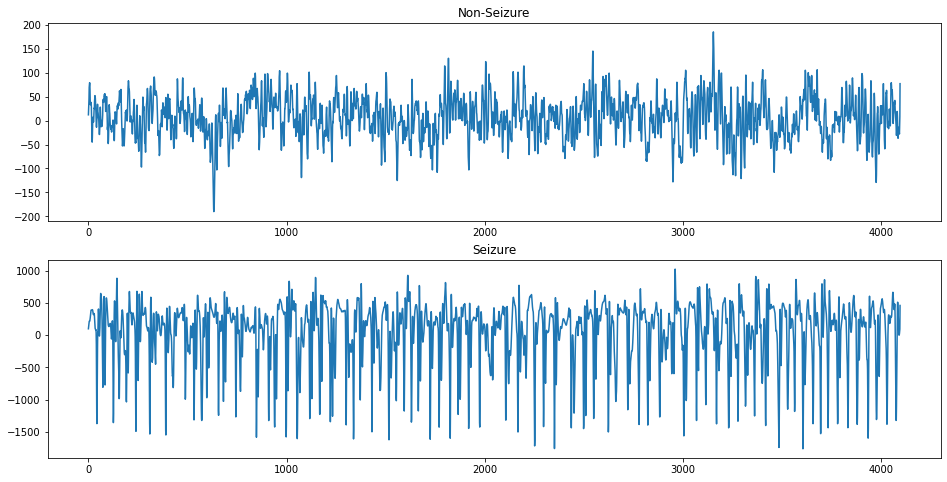

In [ ]:
samples = np.arange(0,4097,1)
plt.figure(figsize=(16,8))
plt.subplot(2,1,1)
plt.title('Non-Seizure')
plt.plot(samples,matNS[:,0], label = 'Non-Seizure')
plt.subplot(2,1,2)
plt.title('Seizure')
plt.plot(samples,matE[:,0],label= 'Seizure')
plt.savefig('ns.png')
plt.show()

#APPLYING WAVELET TRANFORM

##DECOMPOSITION OF SIGNAL INTO SUB-BANDS

In [ ]:
final_values = []

In [ ]:
filters = pywt.wavelist('bior')
print(filters)
print(len(filters))

level = 3
w_name = 'bior6.8'

['bior1.1', 'bior1.3', 'bior1.5', 'bior2.2', 'bior2.4', 'bior2.6', 'bior2.8', 'bior3.1', 'bior3.3', 'bior3.5', 'bior3.7', 'bior3.9', 'bior4.4', 'bior5.5', 'bior6.8']
15


In [ ]:
w = pywt.Wavelet(w_name)
temp_cA = []
temp_cD3 = []
temp_cD2 = []
temp_cD1 = []
for i in matNS.T:
  cA,cD3,cD2,cD1 = pywt.wavedec(i, w, mode='constant', level=level)
  temp_cA.append(cA)
  temp_cD1.append(cD1)
  temp_cD2.append(cD2)
  temp_cD3.append(cD3)
coeff_cA = np.array(temp_cA)
coeff_cD1 = np.array(temp_cD1)
coeff_cD2 = np.array(temp_cD2)
coeff_cD3 = np.array(temp_cD3)

In [ ]:
w = pywt.Wavelet(w_name)
temp_cA_S = []
temp_cD3_S = []
temp_cD2_S = []
temp_cD1_S = []
for i in matE.T:
  cA_S,cD3_S,cD2_S,cD1_S = pywt.wavedec(i, w, mode='constant', level=level)
  temp_cA_S.append(cA_S)
  temp_cD3_S.append(cD3_S)
  temp_cD2_S.append(cD2_S)
  temp_cD1_S.append(cD1_S)
coeff_cA_S = np.array(temp_cA_S)
coeff_cD3_S = np.array(temp_cD3_S)
coeff_cD2_S = np.array(temp_cD2_S)
coeff_cD1_S = np.array(temp_cD1_S)

In [ ]:
print(len(coeff_cA_S[0]))
print(coeff_cD3_S.shape)
print(coeff_cD2_S.shape)
print(coeff_cD1_S.shape)
print(coeff_cA.shape)
print(coeff_cD3.shape)
print(coeff_cD2.shape)
print(coeff_cD1.shape)

527
(100, 527)
(100, 1037)
(100, 2057)
(400, 527)
(400, 527)
(400, 1037)
(400, 2057)


In [ ]:
coeff_cA_total = np.concatenate([coeff_cA, coeff_cA_S])
coeff_cD1_total = np.concatenate([coeff_cD1, coeff_cD1_S])
coeff_cD2_total = np.concatenate([coeff_cD2, coeff_cD2_S])
coeff_cD3_total = np.concatenate([coeff_cD3, coeff_cD3_S])

##VISUALISING THE SUB-BANDS

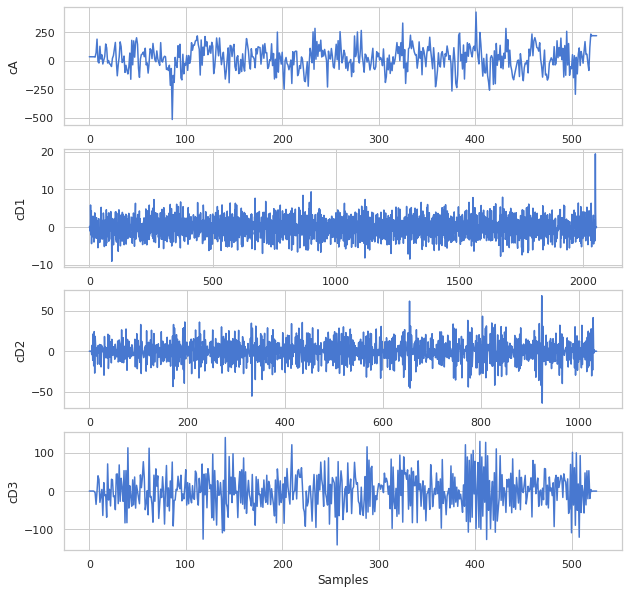

In [ ]:

plt.figure(figsize=(10,10))
plt.subplot(level+1,1,1)
plt.ylabel('cA')
plt.xlabel('Samples')
plt.plot(np.arange(0,len(coeff_cA[0]),1),coeff_cA[0,:].T)

plt.subplot(level+1,1,2)
plt.ylabel('cD1')
plt.xlabel('Samples')
plt.plot(np.arange(0,len(coeff_cD1[0]),1),coeff_cD1[0,:].T)

plt.subplot(level+1,1,3)
plt.ylabel('cD2')
plt.xlabel('Samples')
plt.plot(np.arange(0,len(coeff_cD2[0]),1),coeff_cD2[0,:].T)

plt.subplot(level+1,1,4)
plt.ylabel('cD3')
plt.xlabel('Samples')
plt.plot(np.arange(0,len(coeff_cD3[0]),1),coeff_cD3[0,:].T)

plt.show()

# FEATURE EXTRACTION 

## SVD_Entropy, Fisher_Information, PFD

In [ ]:
help(pyeeg.svd_entropy),help(pyeeg.fisher_info),help(pyeeg.pfd)

Help on function svd_entropy in module pyeeg.entropy:

svd_entropy(X, Tau, DE, W=None)
    Compute SVD Entropy from either two cases below:
    1. a time series X, with lag tau and embedding dimension dE (default)
    2. a list, W, of normalized singular values of a matrix (if W is provided,
    recommend to speed up.)
    
    If W is None, the function will do as follows to prepare singular spectrum:
    
        First, computer an embedding matrix from X, Tau and DE using pyeeg
        function embed_seq():
                    M = embed_seq(X, Tau, DE)
    
        Second, use scipy.linalg function svd to decompose the embedding matrix
        M and obtain a list of singular values:
                    W = svd(M, compute_uv=0)
    
        At last, normalize W:
                    W /= sum(W)
    
    Notes
    -------------
    
    To speed up, it is recommended to compute W before calling this function
    because W may also be used by other functions whereas computing it here
  

(None, None, None)

In [ ]:
# source: https://www.hindawi.com/journals/cin/2011/406391/
def build_features(mat):
    Kmax = 5
    Tau  = 4
    DE   = 10
    M    = 10
    R    = 0.3
    Band = np.arange(1,86)
    Fs   = 173
   # DFA                = pyeeg.dfa(mat)
    HFD                = pyeeg.hfd(mat,Kmax)
    SVD_Entropy        = pyeeg.svd_entropy(mat,Tau,DE)
    #Fisher_Information = pyeeg.fisher_info(mat,Tau,DE)
    PFD                = pyeeg.pfd(mat)
    sleep(0.01)
    
    return (SVD_Entropy,HFD,PFD)

## COMPUTE THE FEATURES OF DATASET
A binary classification for epilectic seizures where class 1 is Non-Seizure class having value (01) and class 2 is Siezure class having value (10)

In [ ]:
# create features of class I and cA
f1_cA_NS    = np.zeros((400,1))
f2_cA_NS    = np.zeros((400,1))
f3_cA_NS    = np.zeros((400,1))

for i in range(400):
    [f1_cA_NS[i,0],f2_cA_NS[i,0],f3_cA_NS[i,0]]=build_features(coeff_cA.T[:,i])

# create features of class I and cD1
f1_cD1_NS    = np.zeros((400,1))
f2_cD1_NS    = np.zeros((400,1))
f3_cD1_NS    = np.zeros((400,1))

for i in range(400):
    [f1_cD1_NS[i,0],f2_cD1_NS[i,0],f3_cD1_NS[i,0]]=build_features(coeff_cD1.T[:,i])
  
# create features of class I and cD2
f1_CD2_NS    = np.zeros((400,1))
f2_CD2_NS    = np.zeros((400,1))
f3_CD2_NS   = np.zeros((400,1))

for i in range(400):
    [f1_CD2_NS[i,0],f2_CD2_NS[i,0],f3_CD2_NS[i,0]]=build_features(coeff_cD2.T[:,i])

# create features of class I and cD3
f1_CD3_NS    = np.zeros((400,1))
f2_CD3_NS    = np.zeros((400,1))
f3_CD3_NS   = np.zeros((400,1))

for i in range(400):
    [f1_CD3_NS[i,0],f2_CD3_NS[i,0],f3_CD3_NS[i,0]]=build_features(coeff_cD3.T[:,i])
    

/usr/local/lib/python3.6/dist-packages/pyeeg-0.4.4-py3.6.egg/pyeeg/fractal_dimension.py:22: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


In [ ]:
# create features of class II (SEIZURE and cA)
f1_cA_S    = np.zeros((100,1))
f2_cA_S    = np.zeros((100,1))
f3_cA_S    = np.zeros((100,1))

for i in range(100):
    [f1_cA_S[i,0],f2_cA_S[i,0],f3_cA_S[i,0]]=build_features(coeff_cA_S.T[:,i])

# create features of class II (SEIZURE and cD1)
f1_cD1_S    = np.zeros((100,1))
f2_cD1_S    = np.zeros((100,1))
f3_cD1_S    = np.zeros((100,1))

for i in range(100):
    [f1_cD1_S[i,0],f2_cD1_S[i,0],f3_cD1_S[i,0]]=build_features(coeff_cD1_S.T[:,i])

# create features of class II (SEIZURE and cD2)
f1_cD2_S    = np.zeros((100,1))
f2_cD2_S    = np.zeros((100,1))
f3_cD2_S    = np.zeros((100,1))

for i in range(100):
    [f1_cD2_S[i,0],f2_cD2_S[i,0],f3_cD2_S[i,0]]=build_features(coeff_cD2_S.T[:,i])

# create features of class II (SEIZURE and cD3)
f1_cD3_S    = np.zeros((100,1))
f2_cD3_S    = np.zeros((100,1))
f3_cD3_S    = np.zeros((100,1))

for i in range(100):
    [f1_cD3_S[i,0],f2_cD3_S[i,0],f3_cD3_S[i,0]]=build_features(coeff_cD3_S.T[:,i])
    

/usr/local/lib/python3.6/dist-packages/pyeeg-0.4.4-py3.6.egg/pyeeg/fractal_dimension.py:22: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


In [ ]:
cl_2_NS    = np.ones((400,1))
cl_2_S = np.zeros((100,1))
cl_1_S    = np.ones((100,1))
cl_1_NS = np.zeros((400,1))

## CREATE FEATURE AND CLASS MATRIX

In [ ]:
MftNS = np.concatenate([f1_cA_NS, f2_cA_NS, f3_cA_NS, f1_cD1_NS, f2_cD1_NS, f3_cD1_NS, f1_CD2_NS, f2_CD2_NS, f3_CD2_NS, f1_CD3_NS, f2_CD3_NS, f3_CD3_NS, cl_1_NS, cl_2_NS], axis=1)
MftS =  np.concatenate([f1_cA_S, f2_cA_S, f3_cA_S, f1_cD1_S, f2_cD1_S, f3_cD1_S, f1_cD2_S, f2_cD2_S, f3_cD2_S, f1_cD3_S, f2_cD3_S, f3_cD3_S, cl_1_S, cl_2_S], axis=1)

In [ ]:
FCM_NS = pd.DataFrame(MftNS,columns=['f1','f2','f3','f4','f5','f6','f7','f8','f9','f10','f11','f12','class1', 'class2'])
FCM_S  = pd.DataFrame(MftS ,columns=['f1','f2','f3','f4','f5','f6','f7','f8','f9','f10','f11','f12','class1', 'class2'])

In [ ]:
FCM_NS.head(4)

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,class1,class2
0,2.286350,0.967641,0.558775,2.239637,1.029616,0.542541,2.301116,1.163859,0.545685,2.282717,1.163209,0.551288,0.0,1.0
1,2.111976,0.989355,0.557385,2.292064,0.995775,0.545959,2.298779,1.164940,0.545951,2.298788,1.099910,0.555252,0.0,1.0
2,2.288472,0.854356,0.559059,2.272285,1.000131,0.543702,2.298882,1.159386,0.545897,2.296325,1.132893,0.550818,0.0,1.0
3,2.295778,1.016290,0.555644,2.300521,0.928181,0.548909,2.299468,1.155746,0.545844,2.297675,1.069998,0.554864,0.0,1.0


In [ ]:
FCM_S.head(4)

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,class1,class2
0,2.290852,0.770139,0.567184,2.301802,1.025866,0.544324,2.300932,1.057219,0.544539,2.301054,1.041773,0.555252,1.0,0.0
1,2.296751,0.834785,0.570395,2.302293,1.009446,0.546849,2.297156,1.091326,0.544900,2.283945,1.151616,0.562004,1.0,0.0
2,2.295411,0.820044,0.564516,2.300412,1.056819,0.547217,2.300498,1.075742,0.545160,2.300038,1.032100,0.557936,1.0,0.0
3,2.233208,1.326843,0.567184,2.300442,1.032809,0.546905,2.282477,1.169728,0.544080,2.298876,1.040143,0.555252,1.0,0.0


In [ ]:
TotalDataset = pd.concat([FCM_NS,FCM_S],ignore_index=True)

visDat = TotalDataset.drop(["class2"],axis=1)
visDat['class1'] = visDat['class1'].map({1:'seizure',0:'Non-Seizure'})

In [ ]:
print(TotalDataset.shape)

(500, 14)


## KRUSKAL-WALLIS H-TEST 

In [ ]:
f = ['cA', 'cD1', 'cD2', 'cD3']
H = []
pval = []
from scipy.stats import mstats
for i in range(0,3*(level+1), 3):

  print("Kruskal Wallis H-test test:")

  h, p = mstats.kruskalwallis(MftNS[:,i], MftS[:,i])
  H.append(h)
  pval.append(p)
  if  pval[int(i/(level+1))] < 0.05:
      print("Reject NULL hypothesis - Significant differences exist between groups.")
  if  pval[int(i/(level+1))] > 0.05:
      print("Accept NULL hypothesis - No significant difference between groups.")

H = np.array(H)
pval = np.array(pval)
P_Table = np.concatenate([H.reshape(len(H),1), pval.reshape(len(pval),1)], axis = 1)
P_Tables = pd.DataFrame(P_Table, columns = ['H-value', 'P-Value'], index = f)


Kruskal Wallis H-test test:
Accept NULL hypothesis - No significant difference between groups.
Kruskal Wallis H-test test:
Accept NULL hypothesis - No significant difference between groups.
Kruskal Wallis H-test test:
Reject NULL hypothesis - Significant differences exist between groups.
Kruskal Wallis H-test test:
Reject NULL hypothesis - Significant differences exist between groups.


In [ ]:
P_Tables

,H-value,P-Value
cA,0.613260,4.335630e-01
cD1,105.540225,9.299093e-25
cD2,14.970060,1.092306e-04
cD3,0.940125,3.322457e-01


##VISUALISING THE FEATURES

In [ ]:
import seaborn as sbn
sbn.set(style="whitegrid", palette="muted")
visDat.head(5)

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,class1
0,2.286350,0.967641,0.558775,2.239637,1.029616,0.542541,2.301116,1.163859,0.545685,2.282717,1.163209,0.551288,Non-Seizure
1,2.111976,0.989355,0.557385,2.292064,0.995775,0.545959,2.298779,1.164940,0.545951,2.298788,1.099910,0.555252,Non-Seizure
2,2.288472,0.854356,0.559059,2.272285,1.000131,0.543702,2.298882,1.159386,0.545897,2.296325,1.132893,0.550818,Non-Seizure
3,2.295778,1.016290,0.555644,2.300521,0.928181,0.548909,2.299468,1.155746,0.545844,2.297675,1.069998,0.554864,Non-Seizure
4,2.261191,0.924741,0.556707,2.298216,0.979312,0.547160,2.299616,1.177092,0.546111,2.295568,1.124840,0.553099,Non-Seizure


In [ ]:
#sbn.pairplot(visDat,hue='class1',palette="husl")
#plt.show()

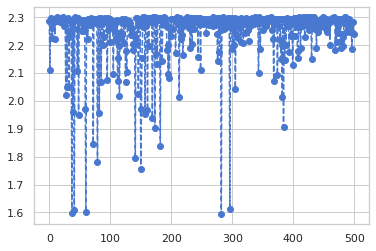

In [ ]:
plt.plot(visDat['f1'],'--o')

#SPLITTING THE DATASET

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = TotalDataset[['f1','f2','f3','f4','f5','f6','f7','f8','f9','f10','f11','f12']]
y = TotalDataset[['class1', 'class2']]
X = np.asarray(X)
y = np.asarray(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
print(X_train)

[[ 0.44614013 -0.81001802 -0.07893655 ...  0.40384798 -0.62858361
   1.27508557]
 [ 0.51545082  0.76991666 -0.11548806 ...  0.35311537 -0.2384832
   1.19027359]
 [ 0.45307003 -0.08283239 -0.25906517 ...  0.32887437 -1.48217333
   0.93914427]
 ...
 [ 0.45053779 -0.868751    0.42225245 ...  0.43529391 -0.07664779
  -0.83764515]
 [ 0.12211805  1.795571    0.46295511 ... -0.53182636  0.79759008
  -0.32273608]
 [ 0.3520519   0.34348399 -1.24900319 ... -0.56618211  0.74749968
  -1.26282412]]


#APPLYING ARTIFICIAL NUERAL NETWORK 
A trained neural network with ten hidden neurons and a single hidden layer is employed to identify the class of a given EEG signal from its features obtained. The ANN consists of linear activation functions and hyperbolic tangent function in its output and hidden layer respectively. The neural network training algorithm used is Levenberg-Marquardt backpropagation algorithm. The output layer consists of two nodes defining each class.

##TRAINING THE NEURAL NETWORK

In [ ]:
net = prn.CreateNN([12,10,2])
net = prn.train_LM(X_train.T,y_train.T,net,verbose=True,k_max=100,E_stop=1e-5)
y_pred_temp = prn.NNOut(X_test.T,net)
y_pred_temp = y_pred_temp.T

Iteration:  0 		Error:  975.19847296884 	scale factor:  3.0
Iteration:  1 		Error:  95.41711556229401 	scale factor:  0.3
Iteration:  2 		Error:  35.49902651564304 	scale factor:  0.3
Iteration:  3 		Error:  31.236125435069468 	scale factor:  0.3
Iteration:  4 		Error:  28.392075514332728 	scale factor:  0.3
Iteration:  5 		Error:  25.888600770099778 	scale factor:  0.3
Iteration:  6 		Error:  23.43660575799266 	scale factor:  0.3
Iteration:  7 		Error:  20.988842926594522 	scale factor:  0.3
Iteration:  8 		Error:  18.630638712149313 	scale factor:  0.3
Iteration:  9 		Error:  16.614920564896007 	scale factor:  0.3
Iteration:  10 		Error:  16.414599575987154 	scale factor:  0.03
Iteration:  11 		Error:  9.666412331001448 	scale factor:  0.03
Iteration:  12 		Error:  8.042216081508364 	scale factor:  0.03
Iteration:  13 		Error:  7.03621878996369 	scale factor:  0.03
Iteration:  14 		Error:  6.442568116823218 	scale factor:  0.03
Iteration:  15 		Error:  5.996044833209604 	scale factor

In [ ]:
print(y_pred_temp)

[[ 5.34895834e-02  9.46510417e-01]
 [ 3.30970715e-03  9.96690293e-01]
 [-2.49174657e-02  1.02491747e+00]
 [-1.18828068e-02  1.01188281e+00]
 [-1.32577861e-02  1.01325779e+00]
 [ 4.09096491e-02  9.59090351e-01]
 [-1.70259846e-02  1.01702598e+00]
 [-4.97905579e-02  1.04979056e+00]
 [ 1.43022866e-02  9.85697713e-01]
 [ 5.29065616e-01  4.70934384e-01]
 [-2.66940587e-02  1.02669406e+00]
 [ 1.45046110e-02  9.85495389e-01]
 [-9.86690193e-01  1.98669019e+00]
 [-6.40812226e-03  1.00640812e+00]
 [ 2.17364299e-03  9.97826357e-01]
 [ 6.21662661e-02  9.37833734e-01]
 [ 9.05867798e-01  9.41322019e-02]
 [ 1.02501311e-02  9.89749869e-01]
 [-7.52857219e-02  1.07528572e+00]
 [ 9.63572100e-01  3.64278997e-02]
 [ 1.06889845e+00 -6.88984529e-02]
 [ 1.41392605e+00 -4.13926053e-01]
 [ 1.39996481e-02  9.86000352e-01]
 [-1.86021351e-02  1.01860214e+00]
 [ 2.81484095e-03  9.97185159e-01]
 [ 9.90293189e-01  9.70681110e-03]
 [ 1.01883431e+00 -1.88343081e-02]
 [ 7.21448256e-03  9.92785517e-01]
 [ 5.51485606e-02  9

In [ ]:
Y_pred = np.zeros((100,1))
for i in range(100):
  Y_pred[i] = np.argmax(y_pred_temp[i,:])

Y_test = np.zeros((100,1))
for i in range(100):
  Y_test[i] = np.argmax(y_test[i,:])

In [ ]:
print(np.concatenate((Y_pred.reshape(len(Y_pred),1), Y_test.reshape(len(Y_test),1)),1))

[[1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]]


##CREATE CONFUSION MATRIX

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_ann = confusion_matrix(Y_test, Y_pred)
print(cm_ann)
val = accuracy_score(Y_test, Y_pred)

[[21  3]
 [ 0 76]]


##VISUALISING ROC CURVE


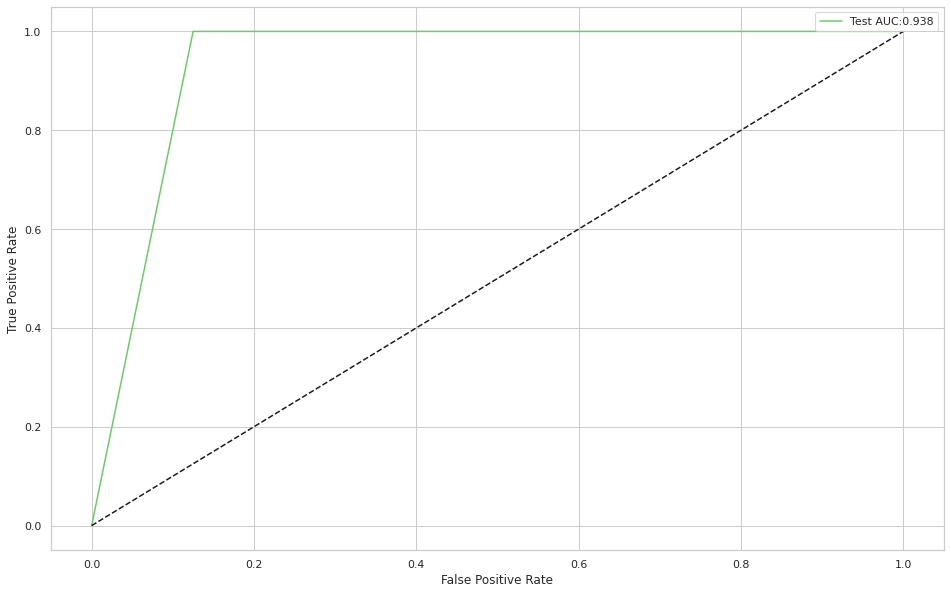

In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score

fpr_test, tpr_test, thresholds_test = roc_curve(Y_test, Y_pred)
auc_test = roc_auc_score(Y_test, Y_pred)

plt.figure(figsize=(16,10))
#plt.plot(fpr_train, tpr_train, 'r-',label ='Train AUC:%.3f'%auc_train)
#plt.plot(fpr_valid, tpr_valid, 'b-',label ='Valid AUC:%.3f'%auc_valid)
plt.plot(fpr_test, tpr_test, 'g-',label ='Test AUC:%.3f'%auc_test)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

#APPLYING SVM CLASSIFICATION

##TRAINING THE NEURAL NETWORK

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train[:,0])

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
Y_train_pred_svm = classifier.predict(X_train)
Y_pred_svm = classifier.predict(X_test)
Y_test_svm = y_test[:, 0]
print(np.concatenate((Y_pred_svm.reshape(len(Y_pred_svm),1), Y_test_svm.reshape(len(Y_test_svm),1)),1))

[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [0. 0.]]


##CREATE CONFUSION MATRIX

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_svm = confusion_matrix(Y_pred_svm, Y_test_svm)
print(cm_svm)
accuracy_score(Y_test_svm, Y_pred_svm)

[[76  4]
 [ 0 20]]


0.96

##VISUALISING ROC CURVE


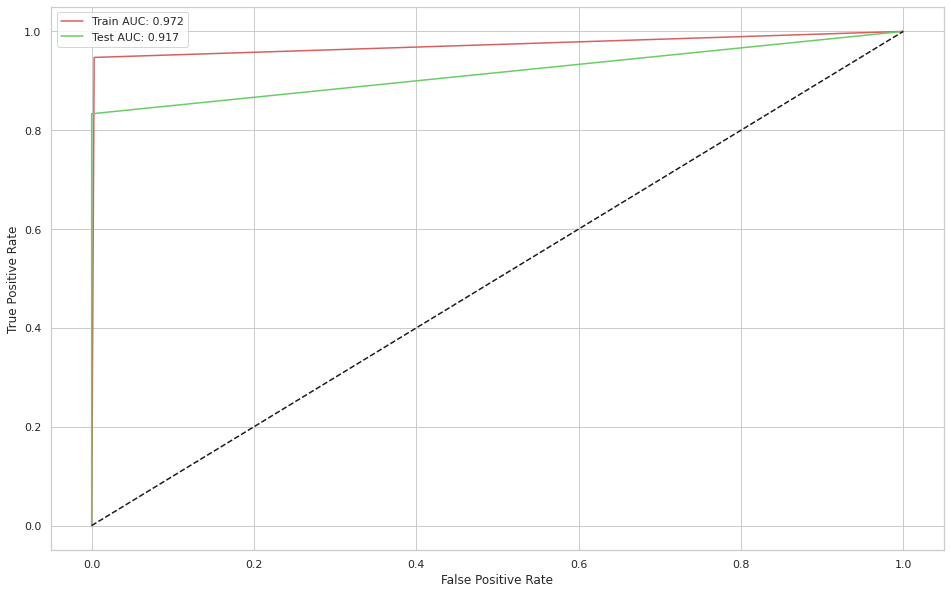

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr_train_svm, tpr_train_svm, thresholds_train = roc_curve(y_train[:,0], Y_train_pred_svm)
auc_train_svm = roc_auc_score(y_train[:,0], Y_train_pred_svm)

fpr_test_svm, tpr_test_svm, thresholds_test = roc_curve(Y_test_svm, Y_pred_svm)
auc_test_svm = roc_auc_score(Y_test_svm, Y_pred_svm)

plt.figure(figsize=(16,10))
plt.plot(fpr_train_svm, tpr_train_svm, 'r-',label ='Train AUC: %.3f'%auc_train_svm)
#plt.plot(fpr_valid, tpr_valid, 'b-',label ='Valid AUC:%.3f'%auc_valid)
plt.plot(fpr_test_svm, tpr_test_svm, 'g-',label ='Test AUC: %.3f'%auc_test_svm)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# APPLY ANN USING TENSORFLOW
Apply ANN using Tensorflow and ADAM backpropagation Algorithm with sigmoid activation function in the output layer

##TRAINING THE NEURAL NETWORK

In [ ]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=10, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
ann.fit(X_train, y_train[:,0], batch_size = 32, epochs = 100)

Epoch 1/100
13/13 [==============================] - 0s 1ms/step - loss: 0.7212 - accuracy: 0.5750
Epoch 2/100
13/13 [==============================] - 0s 1ms/step - loss: 0.6597 - accuracy: 0.6325
Epoch 3/100
13/13 [==============================] - 0s 1ms/step - loss: 0.6060 - accuracy: 0.7125
Epoch 4/100
13/13 [==============================] - 0s 1ms/step - loss: 0.5612 - accuracy: 0.7500
Epoch 5/100
13/13 [==============================] - 0s 1ms/step - loss: 0.5234 - accuracy: 0.7725
Epoch 6/100
13/13 [==============================] - 0s 1ms/step - loss: 0.4904 - accuracy: 0.7925
Epoch 7/100
13/13 [==============================] - 0s 1ms/step - loss: 0.4622 - accuracy: 0.8075
Epoch 8/100
13/13 [==============================] - 0s 1ms/step - loss: 0.4381 - accuracy: 0.8200
Epoch 9/100
13/13 [==============================] - 0s 1ms/step - loss: 0.4165 - accuracy: 0.8400
Epoch 10/100
13/13 [==============================] - 0s 1ms/step - loss: 0.3971 - accuracy: 0.8625
Epoch 11/

In [ ]:
Y_pred_tf = ann.predict(X_test)
Y_pred_tf = (Y_pred_tf > 0.5)
Y_train_pred_tf = ann.predict(X_train)
Y_train_pred_tf = (Y_train_pred_tf > 0.5)

##CREATE CONFUSION MATRIX

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_tf = confusion_matrix(Y_pred_tf, Y_test_svm)
print(cm_tf)
accuracy_score(Y_pred_tf, Y_test_svm)

[[75  3]
 [ 1 21]]


0.96

##VISUALISING ROC CURVE


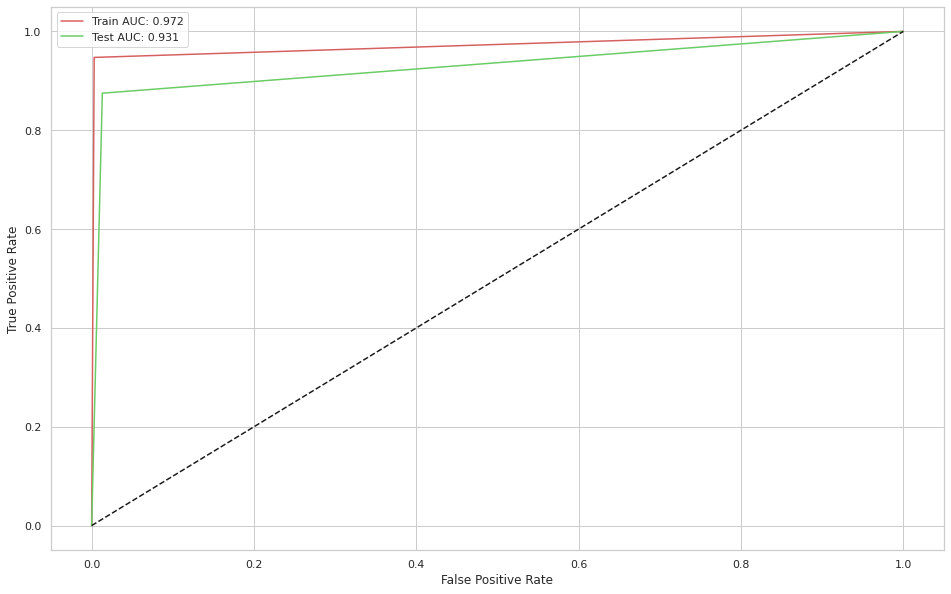

<function print>

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr_train_tf, tpr_train_tf, thresholds_train_tf = roc_curve(y_train[:,0], Y_train_pred_tf)
auc_train_tf = roc_auc_score(y_train[:,0], Y_train_pred_tf)

fpr_test_tf, tpr_test_tf, thresholds_test_tf = roc_curve(Y_test_svm, Y_pred_tf)
auc_test_tf = roc_auc_score(Y_test_svm, Y_pred_tf)

plt.figure(figsize=(16,10))
plt.plot(fpr_train_tf, tpr_train_tf, 'r-',label ='Train AUC: %.3f'%auc_train_tf)
plt.plot(fpr_test_tf, tpr_test_tf, 'g-',label ='Test AUC: %.3f'%auc_test_tf)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
print

#BUILDING ANN MODEL USING CROSS VALIDATION

In [ ]:
def build_classifier():
  ann = tf.keras.models.Sequential()
  ann.add(tf.keras.layers.Dense(units=10, activation='relu'))
  ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
  ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
  return ann


In [ ]:
classifier = KerasClassifier(build_fn=build_classifier, batch_size=10, nb_epoch=150)
accuracies =  cross_val_score(estimator=classifier, X= X_train, y=y_train[:,0],cv=10, n_jobs=-1)

accuracies

array([0.27500001, 0.55000001, 0.69999999, 0.47499999, 0.67500001,
       0.44999999, 0.60000002, 0.69999999, 0.64999998, 0.5       ])

In [ ]:
print(accuracies.mean())
print(accuracies.std())

0.5574999988079071
0.12896220129258995


In [ ]:
final_values.append(val)
print(final_values)

[0.94, 0.97, 0.93, 0.92, 0.95, 0.96, 0.93, 0.93, 0.9, 0.92, 0.96, 0.96, 0.95, 0.94, 0.97]


In [ ]:
import csv


with open('values3.csv', 'w') as csv_file:
    csv_writer = csv.writer(csv_file, delimiter=',')
    csv_writer.writerow(final_values)
    